# Alzheimer's Disease EDA

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('alzheimer.csv')

In [3]:
data.shape

(373, 10)

### Documentation

Group --> Class \
Age --> Age\
EDUC --> Years of Education\
SES --> Socioeconomic Status / 1-5\
MMSE --> Mini Mental State Examination\
CDR --> Clinical Dementia Rating\
eTIV --> Estimated total intracranial volume\
nWBV --> Normalize Whole Brain Volume\
ASF --> Atlas Scaling Factor

### Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [5]:
data.isna().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
df = data.copy(deep=True)

### EDA

In [9]:
df.describe().round(2)

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,77.03,14.70,2.46,27.41,0.27,1489.99,0.73,1.19
std,7.81,2.90,1.13,3.71,0.37,175.77,0.04,0.14
min,60.00,6.00,1.00,4.00,0.00,1106.00,0.64,0.88
25%,71.00,12.00,2.00,27.00,0.00,1358.25,0.70,1.10
50%,77.00,15.00,2.00,29.00,0.00,1470.50,0.73,1.19
75%,82.00,16.75,3.00,30.00,0.50,1595.25,0.76,1.29
max,98.00,23.00,5.00,30.00,2.00,2004.00,0.84,1.59


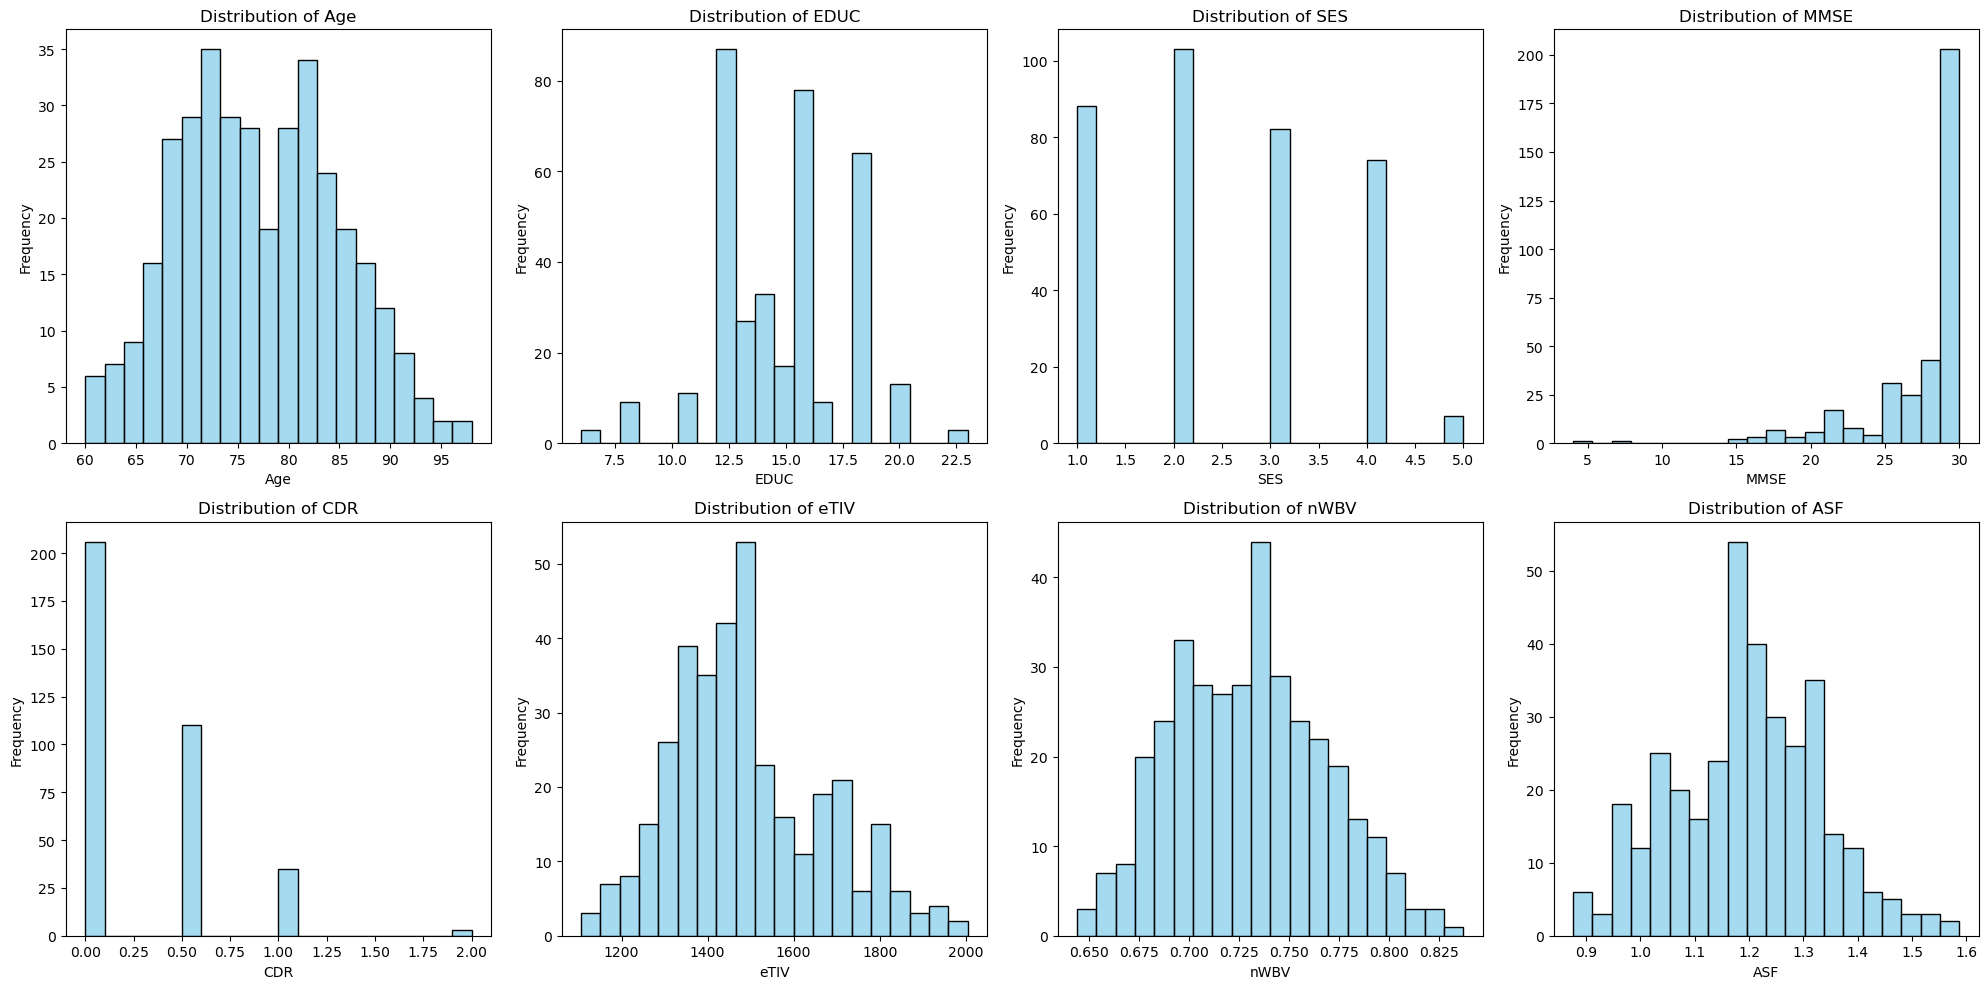

In [10]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(2, len(num_col) // 2, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.histplot(data=df, x=col, kde=False, bins=20, color='skyblue', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

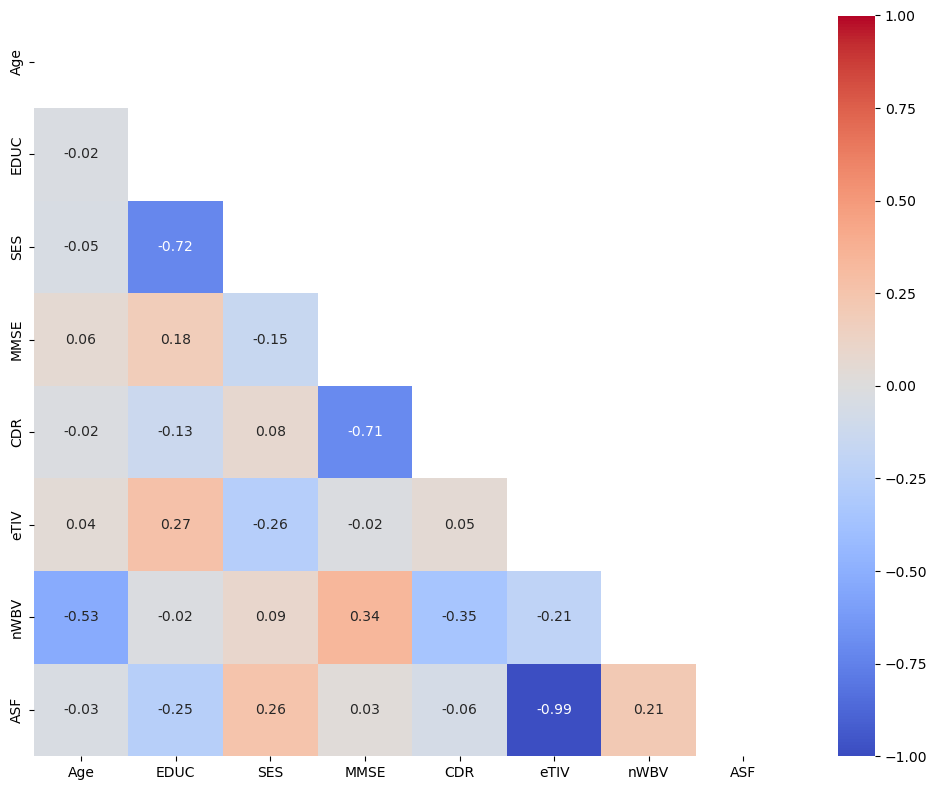

In [11]:
num_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, mask=mask)
plt.tight_layout()
plt.show()

**Key Insights from the Correlation Matrix**:

1. **MMSE and CDR**: Strong negative correlation (-0.71), as higher CDR (severe dementia) correlates with lower MMSE scores (cognitive decline).
   
2. **Age and MMSE**: Very weak positive correlation (0.06), suggesting age has little impact on MMSE in this dataset.

3. **Education (EDUC) and MMSE**: Weak positive correlation (0.18), indicating a mild relationship between education level and cognitive function.

4. **eTIV and ASF**: Strong negative correlation (-0.99), likely indicating they measure similar brain aspects, and one decreases as the other increases.

5. **nWBV and MMSE**: Moderate positive correlation (0.34), suggesting larger brain volumes are associated with better cognitive function.

6. **Age and nWBV**: Moderate negative correlation (-0.53), consistent with age-related brain volume reduction.

7. **Education and SES**: Strong negative correlation (-0.72), indicating that higher SES tends to be associated with more years o**ucation.
**
### Conclusion:
Key correlations to focus on are MMSE/CDR and MMSE/nWBV for insights into cognitive decline and brain health.


## Insights and Visualizations

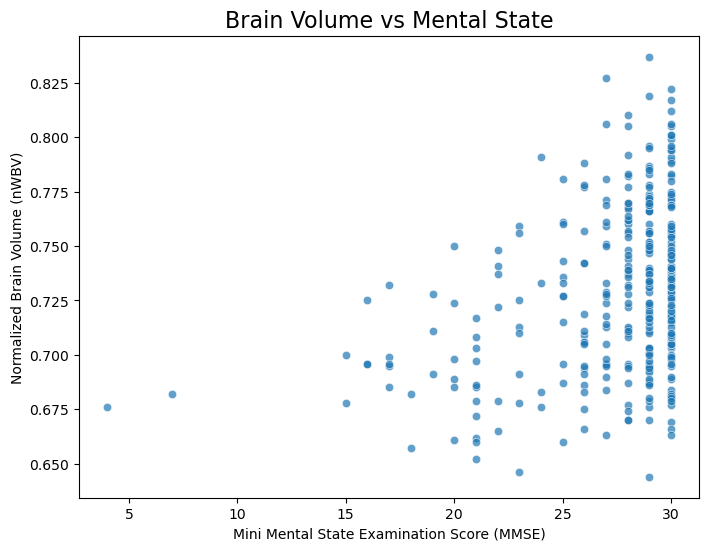

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='MMSE', y='nWBV', alpha=0.7)

plt.title('Brain Volume vs Mental State', size=16)
plt.xlabel('Mini Mental State Examination Score (MMSE)')
plt.ylabel('Normalized Brain Volume (nWBV)')

plt.show()

In real life, Normalized Whole Brain Volume (nWBV) and MMSE (Mini Mental State Examination) are often inversely correlated. As Alzheimer's disease or other neurodegenerative conditions progress, the brain tends to shrink, leading to a reduction in nWBV. This shrinkage is typically linked to cognitive decline, which is measured by the MMSE.

In this context, a lower nWBV (indicating more brain atrophy) is likely associated with a lower MMSE score (indicating worse cognitive function). Thus, individuals with significant brain volume loss may score poorly on the MMSE, reflecting their cognitive impairments. However, the relationship is not always perfect, as other factors such as age, education, and overall health can influence both brain volume and cognitive performance.

In [13]:
avg_mmse_cdr = df.groupby('CDR')['MMSE'].mean().reset_index().round(2)
avg_mmse_cdr

,CDR,MMSE
0,0.0,29.22
1,0.5,26.46
2,1.0,20.31
3,2.0,20.33


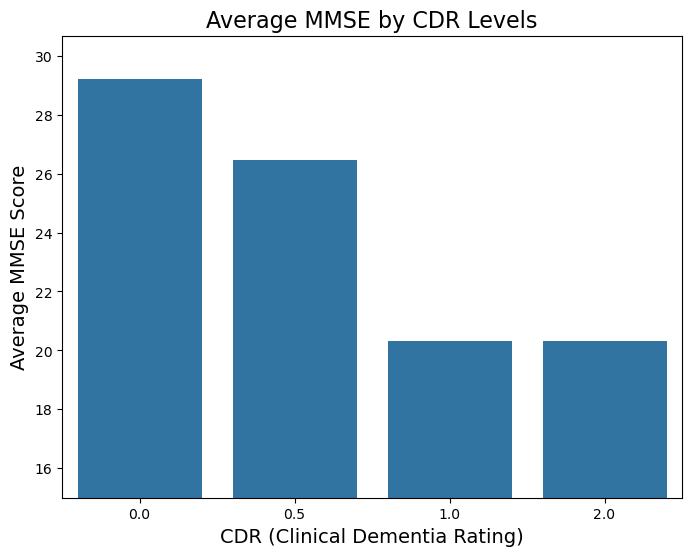

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_mmse_cdr, x='CDR', y='MMSE')
plt.title('Average MMSE by CDR Levels', fontsize=16)
plt.xlabel('CDR (Clinical Dementia Rating)', fontsize=14)
plt.ylabel('Average MMSE Score', fontsize=14)
plt.ylim(15, plt.ylim()[1])
plt.show()

The bar chart reveals a clear negative correlation between the CDR levels and the average MMSE scores. As the CDR (Clinical Dementia Rating) increases, indicating a worsening of dementia severity, the average MMSE score decreases. This reflects the expected trend that individuals with more severe dementia show lower cognitive function as measured by the MMSE.

### Hypohtesis Testing

- **Null Hypothesis (H₀):**  
There is no significant relationship between CDR levels and MMSE scores. In other words, dementia does not affect MMSE scores.

- **Alternative Hypothesis (H₁):**  
There is a significant negative relationship between CDR levels and MMSE scores. As dementia increases, MMSE scores decrease.

In [15]:
# Pearson's Correlation Test
correlation, p_value = stats.pearsonr(df['CDR'], df['MMSE'])

print("Pearson correlation:", correlation)
print("p-value:", p_value)

Pearson correlation: -0.7059617213361837
p-value: 1.1066951767933262e-54


## Conclusion

Given the Pearson correlation of -0.71 and an extremely low p-value (close to zero), we can confidently reject the null hypothesis (H₀) in favor of the alternative hypothesis (H₁). This strong negative correlation indicates that as CDR levels (dementia severity) increase, MMSE scores (cognitive function) significantly decrease.

The result suggests that dementia severity, as measured by the CDR scale, has a substantial and statistically significant impact on cognitive function, as reflected in the MMSE scores. Therefore, the findings support the idea that worsening dementia correlates with cognitive decline.